In [1]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import json
import time
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
image_pred = pd.read_csv("image_predictions.tsv", sep='\t')

In [3]:
twitter_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
twitter_archive.text.sample()

561    RT @dog_rates: "Yep... just as I suspected. Yo...
Name: text, dtype: object

In [5]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
twitter_archive[~twitter_archive.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [8]:
image_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [10]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
with open("tweet_json.txt") as file:
    twt_data = json.load(file)
tweet_info = pd.DataFrame(columns=["tweet_id", "timestamp", "retweet_count", "favorite_count"])
for twt in twt_data["tweets"]:
    tweet_info = tweet_info.append({"tweet_id":twt['id'], "timestamp":twt['created_at']\
                                   ,"retweet_count":twt['retweet_count'], "favorite_count":\
                                    twt['favorite_count']},ignore_index = True) 
    

In [12]:
tweet_info.head(5)

,tweet_id,timestamp,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8330,38100
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6154,32690
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4072,24599
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8474,41456
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9168,39628


In [13]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
tweet_id          2340 non-null object
timestamp         2340 non-null object
retweet_count     2340 non-null object
favorite_count    2340 non-null object
dtypes: object(4)
memory usage: 73.2+ KB


# Assess

## Quality Issues


#### `twitter_archive` table
<ul>
    <li>timestamp to date time data type</li>
    <li>retweeted_status_timestamp is an object rather than data_time data type.</li>
    <li>Symbols in text column</li>
    <li>tweet_id to be converted to string data type from integer</li>
    <li>in_reply_to_status_id to String data type</li>
    <li>in_reply_to_user_id to String data type</li>
    
</ul>

#### `image_pred` table
<ul>
    <li>"a" tags in source</li>    
    <li>"_" used as separator in p1 column of image_pred df</li>
    <li>"_" used as separator in p2 column of image_pred df</li>
    <li>"_" used as separator in p3 column of image_pred df</li>
    <li>tweet_id in image_pred to be converted to strint data type from integer</li>
    <li>Types of dogs to category data type</li>
    <li>image_num to String data type</li>
    <li>desktop_computer as value in p1</li>
    <li> "-" in certain letters to split them</li>
    <li>Not all first names, second names and third names are capitalized</li>
</ul>

#### `tweet_info` table
<ul>
    <li>timestamp should be date time data type</li>
    <li>retweet_count column should be integer</li>
    <li>favorite_count should be integer</li>
</ul>

## Tidiness Issues

<ul>
    <li>Type of dog in "doggo", "floofer", "pupper", "puppo" columns instead of one column.</li>
    <li>`tweet_info` table should be a part of `twitter_archive` table</li>
</ul>

# Clean

In [14]:
twitter_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
tweet_info_clean = tweet_info.copy()

### `twitter_archive`: timestamp and retweeted_status_timestamp to date time data type

#### Define

timestamp column and retweeted_status_timestamp column is in object data type and changing it to date_time date type makes analysis easier

#### Code

In [15]:
twitter_clean["timestamp"] = pd.to_datetime(twitter_archive["timestamp"])
twitter_clean["retweeted_status_timestamp"] = pd.to_datetime(twitter_clean["retweeted_status_timestamp"])

#### Test

In [16]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### `image_pred`: HTML a tags in source column

#### Define

URL links are enclosed inside opening and closing "a" tags.

#### Code

In [17]:
twitter_clean["source"] = twitter_clean["source"].str.extract(r'(http[^\"^\s]*)')

#### Test

In [18]:
twitter_clean.source.sample(10)

1482                        http://vine.co
2259                    http://twitter.com
257     http://twitter.com/download/iphone
280     http://twitter.com/download/iphone
2282    http://twitter.com/download/iphone
1743                        http://vine.co
782     http://twitter.com/download/iphone
1588    http://twitter.com/download/iphone
1605    http://twitter.com/download/iphone
1654    http://twitter.com/download/iphone
Name: source, dtype: object

In [19]:
tweet_info.head(5)

,tweet_id,timestamp,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8330,38100
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6154,32690
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4072,24599
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8474,41456
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9168,39628


### `tweet_info` tweet id is an object

#### Define

Convert tweet_id column to integer data type

#### Code

In [20]:
tweet_info_clean["tweet_id"] = tweet_info_clean.tweet_id.astype(int)

#### Test

In [21]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### `twitter_archive` tweet_id should be a string

#### Define
Convert tweet_id to String

### Code

In [22]:
twitter_clean["tweet_id"] = twitter_clean.tweet_id.astype(str)

#### Test

In [23]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetim

### `image_pred` "_" used as separators in p1, p2 and p3

#### Define
Replace _ with spaces in p1, p2 and p3 columns

#### Code

In [24]:
image_pred_clean.p1.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [25]:
image_pred_clean["p1"] = image_pred_clean.p1.str.replace("_", " ")
image_pred_clean["p2"] = image_pred_clean.p2.str.replace("_", " ")
image_pred_clean["p3"] = image_pred_clean.p3.str.replace("_", " ")

#### Test

In [26]:
print(image_pred_clean.p1.head())
print(image_pred_clean.p2.head())
print(image_pred_clean.p3.head())

0    Welsh springer spaniel
1                   redbone
2           German shepherd
3       Rhodesian ridgeback
4        miniature pinscher
Name: p1, dtype: object
0                collie
1    miniature pinscher
2              malinois
3               redbone
4            Rottweiler
Name: p2, dtype: object
0      Shetland sheepdog
1    Rhodesian ridgeback
2             bloodhound
3     miniature pinscher
4               Doberman
Name: p3, dtype: object


### `image_pred` "-" used as separator of names in some rows

#### Define

Replace - with spaces in p1, p2 and p3 colunns

#### Code

In [27]:
image_pred_clean["p1"] = image_pred_clean.p1.str.replace("-", " ")
image_pred_clean["p2"] = image_pred_clean.p2.str.replace("-", " ")
image_pred_clean["p3"] = image_pred_clean.p3.str.replace("-", " ")

#### Test

In [28]:
image_pred_clean.p1.sample(10)

1252                      kelpie
982                    Chihuahua
1175                     Samoyed
776            Italian greyhound
575           Labrador retriever
1493    Chesapeake Bay retriever
42              miniature poodle
1659                    Pembroke
127                     Pembroke
960                     web site
Name: p1, dtype: object

### `image_pred` Not all first names, second names and third names are capitalized

#### Define

Capitalize the first letters of all rows in p1, p2 and p3 columns

#### Code

In [29]:
image_pred_clean["p1"] = image_pred_clean.p1.str.title()
image_pred_clean["p2"] = image_pred_clean.p2.str.title()
image_pred_clean["p3"] = image_pred_clean.p3.str.title()

#### Test

In [30]:
print(image_pred_clean.p1.sample(5))
print(image_pred_clean.p2.sample(5))
print(image_pred_clean.p3.sample(5))

419          Eskimo Dog
390                  Ox
646          Pomeranian
731     Norwich Terrier
1264                Pug
Name: p1, dtype: object
1916          Toy Poodle
1719     German Shepherd
510      Standard Poodle
1490    Golden Retriever
799      German Shepherd
Name: p2, dtype: object
1985    Chesapeake Bay Retriever
884                   Shower Cap
1080                  Eskimo Dog
1090                    Leonberg
2058          Labrador Retriever
Name: p3, dtype: object


### `tweet_info` retweet count is an object

#### Define

Convert retweet count column to integer data type

#### Code

In [31]:
tweet_info_clean["retweet_count"] = tweet_info_clean.retweet_count.astype(int)

#### Test

In [32]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
tweet_id          2340 non-null int64
timestamp         2340 non-null object
retweet_count     2340 non-null int64
favorite_count    2340 non-null object
dtypes: int64(2), object(2)
memory usage: 73.2+ KB


### `tweet_info` tweet_id is an integer

#### Define

Convert tweet_id to String data type

#### Code

In [33]:
tweet_info_clean["tweet_id"] = tweet_info_clean.tweet_id.astype(str)

#### Test

In [34]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
tweet_id          2340 non-null object
timestamp         2340 non-null object
retweet_count     2340 non-null int64
favorite_count    2340 non-null object
dtypes: int64(1), object(3)
memory usage: 73.2+ KB


### `tweet_info` favorite count is an object

#### Define

Convert favorite_count to integer data type

#### Code

In [35]:
tweet_info_clean["favorite_count"] = tweet_info_clean.favorite_count.astype(int)

#### Test

In [36]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
tweet_id          2340 non-null object
timestamp         2340 non-null object
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(2), object(2)
memory usage: 73.2+ KB


### `tweet_info` should be a part of `twitter_archive`

#### Define

The columns "retweet_count" and "favorite_counts" should be a part of twitter_archive and these two can be merged on tweet_id

#### Code

In [37]:
twitter_clean.drop("timestamp",axis=1, inplace=True)
twitter_clean = twitter_clean.merge(tweet_info_clean, how="left", on="tweet_id")

#### Test

In [38]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
timestamp                     2340 non-null object
retweet_count          

### Sorting `twitter_archive` by timestamp

In [39]:
twitter_clean.sort_values(by=["timestamp"], inplace=True)

### One variable is present as 4 columns in `twitter_archive` table

#### Define

Use melt() function to convert "doggo", "floofer", "pupper", "puppo" into a single column

#### Code

In [40]:
test = twitter_clean.copy()

In [41]:
idVars = list(twitter_clean.columns)
del idVars[13:17]


In [42]:
twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'timestamp', 'retweet_count', 'favorite_count'],
      dtype='object')

In [43]:
# twitter_clean.doggo.replace({"doggo", "1", None, "0"}, inplace=True)
# twitter_clean.floofer.replace({"floofer", "1", "None", "0"}, inplace=True)
# twitter_clean.pupper.replace({"pupper", "1", "None", "0"}, inplace=True)
# twitter_clean.puppo.replace({"puppo", "1", "None", "0"}, inplace= True)
# twitter_clean["doggo"] = twitter_clean.doggo.apply(lambda x: 1 if x == "doggo" else 0)
# twitter_clean["floofer"] = twitter_clean.floofer.apply(lambda x: 1 if x == "floofer" else 0)
# twitter_clean["pupper"] = twitter_clean.pupper.apply(lambda x: 1 if x == "pupper" else 0)
# twitter_clean["puppo"] = twitter_clean.puppo.apply(lambda x: 1 if x == "puppo" else 0)

In [44]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,timestamp,retweet_count,favorite_count
1209,715696743237730304,NaN,NaN,http://twitter.com/download/iphone,Meet Toby. He's a Lithuanian High-Steppin Stic...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/715696743...,10,10,Toby,None,None,None,None,Fri Apr 01 00:26:15 +0000 2016,1369.0,4078.0
1208,715704790270025728,NaN,NaN,http://vine.co,This is Bentley. He gives kisses back. 11/10 p...,NaN,NaN,NaT,https://vine.co/v/ijAlDnuOD0l,11,10,Bentley,None,None,None,None,Fri Apr 01 00:58:13 +0000 2016,603.0,2916.0
1207,715733265223708672,NaN,NaN,http://twitter.com/download/iphone,This is a taco. We only rate dogs. Please only...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None,Fri Apr 01 02:51:22 +0000 2016,1796.0,4884.0
1206,715758151270801409,NaN,NaN,http://vine.co,This is old now but it's absolutely heckin fan...,NaN,NaN,NaT,https://vine.co/v/hYdLVKDpAFu,13,10,old,None,None,None,None,Fri Apr 01 04:30:16 +0000 2016,1513.0,3909.0
1205,715928423106027520,NaN,NaN,http://twitter.com/download/iphone,This is Bubbles. He's a Yorkshire Piccolope. 1...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/715928423...,11,10,Bubbles,None,None,None,None,Fri Apr 01 15:46:52 +0000 2016,930.0,3333.0


In [45]:
twitter_clean.doggo.unique

<bound method Series.unique of 1209     None
1208     None
1207     None
1206     None
1205     None
219      None
218      None
217      None
1190     None
1189     None
1188     None
1187     None
1186     None
205      None
204      None
1170     None
1169     None
1168     None
194      None
193      None
176      None
175      None
174      None
1151     None
872      None
871      None
870      None
857     doggo
844      None
843      None
        ...  
793      None
792      None
778     doggo
777      None
776      None
775      None
760      None
759      None
758      None
757      None
756      None
736      None
735      None
734      None
19       None
95       None
101      None
118      None
132      None
155      None
247      None
260      None
298      None
382      None
506      None
566      None
784      None
818     doggo
932      None
1726     None
Name: doggo, Length: 2356, dtype: object>

## Analysis

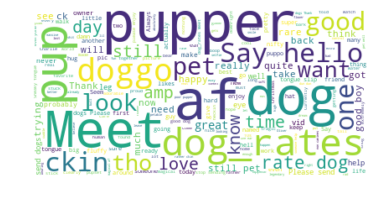

In [58]:
all_text = " ".join(rev for rev in twitter_clean.text)
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
image_pred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
873,697995514407682048,https://pbs.twimg.com/media/Ca_HN8UWEAEB-ga.jpg,1,Staffordshire Bullterrier,0.280222,True,Boston Bull,0.161478,True,American Staffordshire Terrier,0.126884,True
1565,793845145112371200,https://pbs.twimg.com/media/CwRN8H6WgAASe4X.jpg,1,Old English Sheepdog,0.765277,True,Bedlington Terrier,0.112753,True,Kerry Blue Terrier,0.047662,True
925,702539513671897089,https://pbs.twimg.com/media/Cb_r8qTUsAASgdF.jpg,3,Pomeranian,0.714367,True,Shih Tzu,0.040574,True,Silky Terrier,0.032511,True
244,670465786746662913,https://pbs.twimg.com/media/CU35E7VWEAAKYBy.jpg,1,Axolotl,0.611558,False,Tailed Frog,0.186484,False,Common Newt,0.078694,False
1369,761976711479193600,https://pbs.twimg.com/media/CpMVxoRXgAAh350.jpg,3,Labrador Retriever,0.475552,True,Chesapeake Bay Retriever,0.082898,True,Staffordshire Bullterrier,0.048464,True


In [48]:
twitter_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,timestamp,retweet_count,favorite_count
1633,684241637099323392,NaN,NaN,http://twitter.com/download/iphone,This is Obi. He got camera shy. 12/10 https://...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/684241637...,12,10,Obi,None,None,None,None,Tue Jan 05 05:14:53 +0000 2016,3540.0,8566.0
499,813127251579564032,NaN,NaN,http://twitter.com/download/iphone,Here's an anonymous doggo that appears to be v...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/813127251...,11,10,None,doggo,None,None,None,Sun Dec 25 21:00:18 +0000 2016,3429.0,12683.0
1092,737322739594330112,NaN,NaN,http://twitter.com/download/iphone,Say hello to Lily. She's not injured or anythi...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/737322739...,9,10,Lily,None,None,None,None,Mon May 30 16:40:14 +0000 2016,866.0,3783.0
628,794926597468000259,NaN,NaN,http://twitter.com/download/iphone,This is Mack. He's rather h*ckin sleepy. Excep...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/794926597...,12,10,Mack,None,None,None,None,Sat Nov 05 15:37:24 +0000 2016,2540.0,11043.0
1854,675534494439489536,NaN,NaN,http://twitter.com/download/iphone,Seriously guys?! Only send in dogs. I only rat...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/675534494...,11,10,a,None,None,None,None,Sat Dec 12 04:35:48 +0000 2015,438.0,1879.0


In [60]:
twitter_clean.loc[1854, "text"]

'Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj'

### Number of images classified as dogs vs number of classified as not dogs in predictions

In [49]:
pred_len = image_pred_clean.shape[0]
dogs_in_predictions = [image_pred_clean.p1_dog.sum(), image_pred_clean.p2_dog.sum(),image_pred_clean.p3_dog.sum()]
not_dog_predictions = [pred_len - image_pred_clean.p1_dog.sum(), pred_len - image_pred_clean.p2_dog.sum(), pred_len - image_pred_clean.p3_dog.sum()]

In [50]:
dogs_in_predictions

[1532, 1553, 1499]

In [51]:
not_dog_predictions

[543, 522, 576]

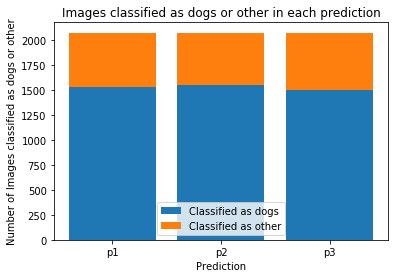

In [52]:
dog_nodog_labels = ["p1", "p2", "p3"]
dogs_bar = plt.bar(range(3), dogs_in_predictions)
nondogs_bar = plt.bar(range(3), not_dog_predictions, bottom=dogs_in_predictions)
plt.xticks(range(3), labels=dog_nodog_labels )
plt.xlabel("Prediction")
plt.ylabel("Number of Images classified as dogs or other")
plt.legend((dogs_bar[0], nondogs_bar[0]), ('Classified as dogs', 'Classified as other'))
plt.title("Images classified as dogs or other in each prediction")
plt.show()

### Average confidence level in predictions 

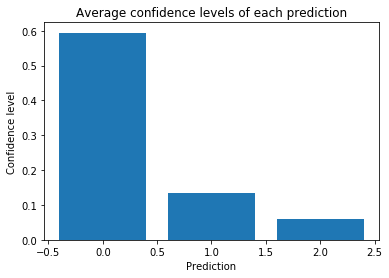

In [53]:
conf_levels = [image_pred_clean.p1_conf.mean(), image_pred_clean.p2_conf.mean(), image_pred_clean.p3_conf.mean()]
plt.bar(range(3), conf_levels)
plt.xlabel("Prediction")
plt.ylabel("Confidence level")
plt.title("Average confidence levels of each prediction")
plt.show()

The confidence level of predictions seem to be high for the first prediction and it decreases with further predictions.

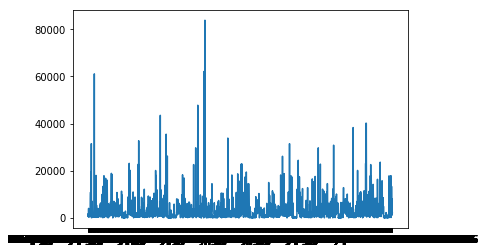

In [57]:
non_null = twitter_clean[~twitter_clean.timestamp.isnull()]
plt.plot(non_null.timestamp, non_null.retweet_count)
plt.show()

### Does rating affect likes?

In [65]:
import statsmodels.api as sm
twitter_clean["intercept"] = 1
test = twitter_clean[~twitter_clean.favorite_count.isnull()]
fav_model = sm.OLS(test["favorite_count"], test[["intercept", "rating_numerator"]])
fav_model_results = fav_model.fit()
fav_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06014
Date:                Tue, 01 Jan 2019   Prob (F-statistic):              0.806
Time:                        13:29:10   Log-Likelihood:                -25366.
No. Observations:                2340   AIC:                         5.074e+04
Df Residuals:                    2338   BIC:                         5.075e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         7958.8039    265.576     29.968      0.000    7438.015    8479.592
rating_numerator     1.3608      5.549      0.245      0.806      -9.521      12.242
==============================================================================
Omnibus:                     2238.262   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118642.743
Skew:                           4.510   Prob(JB):                         0.00
Kurtosis:                      36.697   Cond. No.                         49.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above model, it is evident that the rating of a dog does not affect the number of likes that a tweet receives from the p-value. 